In [53]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bring data an mask target
total_data = pd.read_csv("../data/interim/eda_total_data.csv")
target = 'Transported'
total_data.head(3)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False


VISUALIZATIONS

target

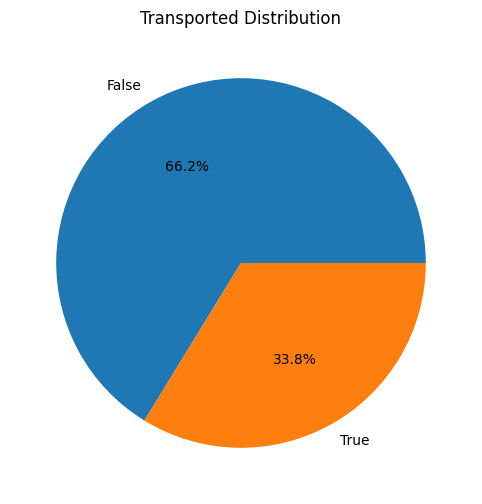

In [54]:
plt.figure(figsize=(10,6))
plt.pie(x=total_data["Transported"].value_counts(), 
        labels=total_data["Transported"].value_counts().index, 
        autopct="%1.1f%%")
plt.title("Transported Distribution")
plt.show()

La distribución muestra que solamente el 33,8% de los pasajeros fueron teletransportados, mientras que el restante 66.2% no lo fueron.

In [55]:
total_data.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False


Text(0.5, 1.0, 'Age Feature Distribution (every age)')

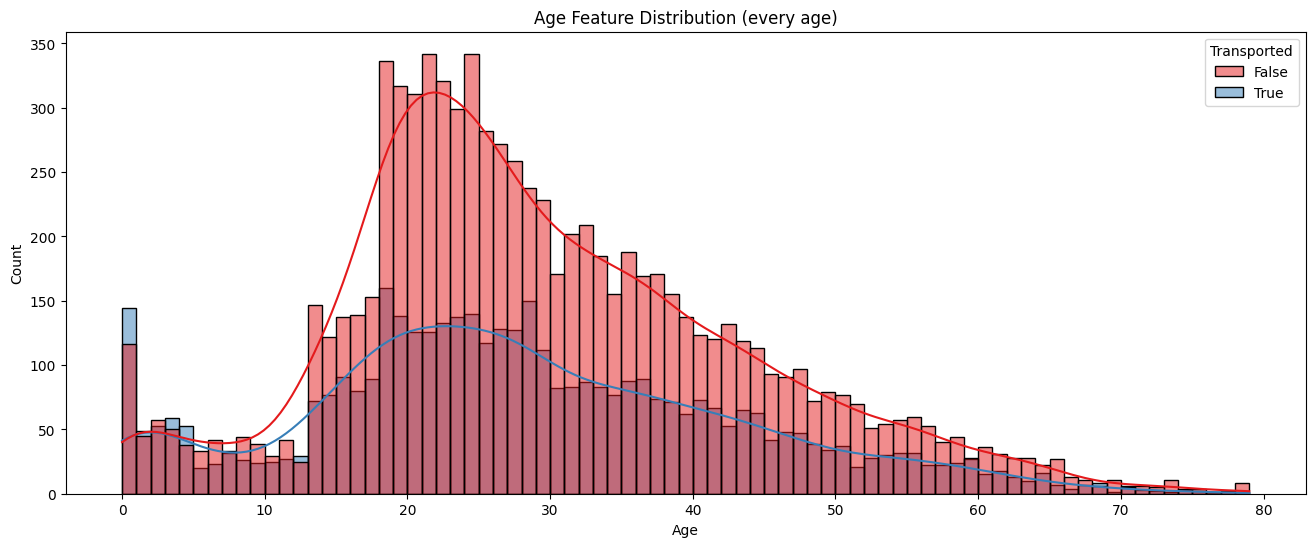

In [56]:
plt.figure(figsize=(16,6))
sns.histplot(x=total_data["Age"],
             hue="Transported",
             data=total_data,
             kde=True,
             palette="Set1",
             binwidth=1)
plt.title("Age Feature Distribution (every age)")

La relación entre edad y transportados nos muestra lo siguiente:
0-3 tiene mas transportados que no


Transported  False  True  diff  total     %
Age                                        
0.0            116   144    28    260  0.11
1.0             45    49     4     94  0.04
2.0             57    53    -4    110 -0.04
3.0             50    59     9    109  0.08
4.0             38    53    15     91  0.16
...            ...   ...   ...    ...   ...
75.0             4     2    -2      6 -0.33
76.0             1     1     0      2  0.00
77.0             2     1    -1      3 -0.33
78.0             3     1    -2      4 -0.50
79.0             5     0    -5      5 -1.00

[80 rows x 5 columns]
Transported grupo_cuartil    diff  total       %
0               Cuartil 1  -33.65   3215 -0.1485
1               Cuartil 2 -127.20   6728 -0.3740
2               Cuartil 3  -38.35   2379 -0.3170
3               Cuartil 4   -7.00    378 -0.3755


C:\Users\Francesc\AppData\Local\Temp\ipykernel_2072\2416256764.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_cuartiles = age_transported_counts.groupby('grupo_cuartil').agg({


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,False
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
12966,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
12967,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
12968,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


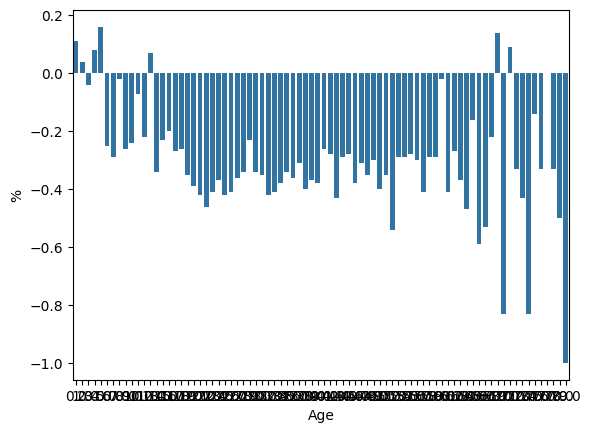

In [57]:
age_transported_counts = total_data.groupby(['Age','Transported']).size().unstack(fill_value=0)
age_transported_counts['diff'] = age_transported_counts[True] - age_transported_counts[False]
age_transported_counts["total"] = age_transported_counts[True] + age_transported_counts[False]
age_transported_counts["%"] = round(age_transported_counts['diff'] / age_transported_counts["total"],2)
print(age_transported_counts)

sns.barplot(x= age_transported_counts.index,
            y= age_transported_counts['%'],
            )


age_transported_counts = age_transported_counts.reset_index()

# Crear los grupos basados en cuartiles (o cualquier otro número de grupos que desees)
age_transported_counts['grupo_cuartil'] = pd.qcut(age_transported_counts['Age'], q=4, labels=["Cuartil 1", "Cuartil 2", "Cuartil 3", "Cuartil 4"])

# Ahora podemos agrupar por estos cuartiles y calcular la diferencia media en cada grupo
grupo_cuartiles = age_transported_counts.groupby('grupo_cuartil').agg({
    'diff': 'mean',  # Promedio de las diferencias
    'total': 'sum',  # Suma del total de personas en cada cuartil
    '%': 'mean'      # Promedio de las diferencias porcentuales
}).reset_index()

# Ver el resultado
print(grupo_cuartiles)


Conclusiones para la relación entre transportados.
Donde 